This notebook presents the training and evaluation of the ***XGBoost classifier*** applied to the Tennessee Eastman Process (TEP) dataset for multivariate time-series fault classification with metrics like F1 score (weighted), test accuracy, train accuracy, ROC curve, PR curve and confusion matrix to understand the model better.

## Module versions used:

In [ ]:
import sys
libraries = {
    'python': sys.version.split()[0],
    'numpy': __import__('numpy').__version__,
    'pandas': __import__('pandas').__version__,
    'torch': __import__('torch').__version__,
    'tensorflow': __import__('tensorflow').__version__,
    'scikit-learn': __import__('sklearn').__version__,
}

for lib, version in libraries.items():
    print(f"{lib} == {version}")

python == 3.11.7
numpy == 2.0.2
pandas == 2.2.3
torch == 2.5.1+cpu
tensorflow == 2.18.0
scikit-learn == 1.6.1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv(r'supervised_train_new.csv')
test = pd.read_csv(r'supervised_test_new.csv')
val = pd.read_csv(r'supervised_val_new.csv')


In [ ]:
X_train = train.iloc[:, 3:55]
y_train = train['faultNumber']

X_test = test.iloc[:, 3:55]
y_test = test['faultNumber']

X_val = val.iloc[:, 3:55]
y_val = val['faultNumber']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Encode target labels
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

In [ ]:
model = XGBClassifier(n_estimators=250,
                      learning_rate=0.1,
                      max_depth=6,
                      random_state=42,
                      eval_metric='merror')

In [ ]:
history = model.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_val, y_val)],
                verbose=True)

[0]	validation_0-merror:0.13575	validation_1-merror:0.14930
[1]	validation_0-merror:0.12891	validation_1-merror:0.14110
[2]	validation_0-merror:0.12075	validation_1-merror:0.13304
[3]	validation_0-merror:0.11947	validation_1-merror:0.13181
[4]	validation_0-merror:0.11738	validation_1-merror:0.13007
[5]	validation_0-merror:0.11604	validation_1-merror:0.12842
[6]	validation_0-merror:0.11476	validation_1-merror:0.12712
[7]	validation_0-merror:0.11262	validation_1-merror:0.12499
[8]	validation_0-merror:0.11135	validation_1-merror:0.12421
[9]	validation_0-merror:0.11021	validation_1-merror:0.12270
[10]	validation_0-merror:0.10911	validation_1-merror:0.12196
[11]	validation_0-merror:0.10810	validation_1-merror:0.12096
[12]	validation_0-merror:0.10686	validation_1-merror:0.12022
[13]	validation_0-merror:0.10651	validation_1-merror:0.11963
[14]	validation_0-merror:0.10512	validation_1-merror:0.11837
[15]	validation_0-merror:0.10437	validation_1-merror:0.11782
[16]	validation_0-merror:0.10321	v

In [ ]:
y_pred = history.predict(X_test)

{'validation_0': OrderedDict([('merror', [0.13574566831683169, 0.12890779702970298, 0.12074566831683169, 0.1194740099009901, 0.11738242574257425, 0.11603960396039605, 0.11476485148514852, 0.11262066831683168, 0.11134591584158415, 0.11020730198019801, 0.10911200495049506, 0.10810334158415842, 0.10686262376237624, 0.10650990099009901, 0.10512066831683169, 0.10436881188118811, 0.10321163366336633, 0.10237623762376237, 0.10149133663366337, 0.10127475247524753, 0.1006930693069307, 0.09975556930693069, 0.09934096534653465, 0.09819925742574258, 0.09705754950495049, 0.09574876237623763, 0.09515779702970296, 0.09442450495049505, 0.09359529702970297, 0.09316522277227723, 0.09240408415841585, 0.09138613861386138, 0.09098700495049505, 0.08987933168316832, 0.08936881188118811, 0.08867574257425742, 0.0882549504950495, 0.08749690594059406, 0.08681002475247525, 0.08621905940594059, 0.08539294554455445, 0.08465346534653466, 0.08412747524752476, 0.0836200495049505, 0.08303217821782179, 0.082469059405940

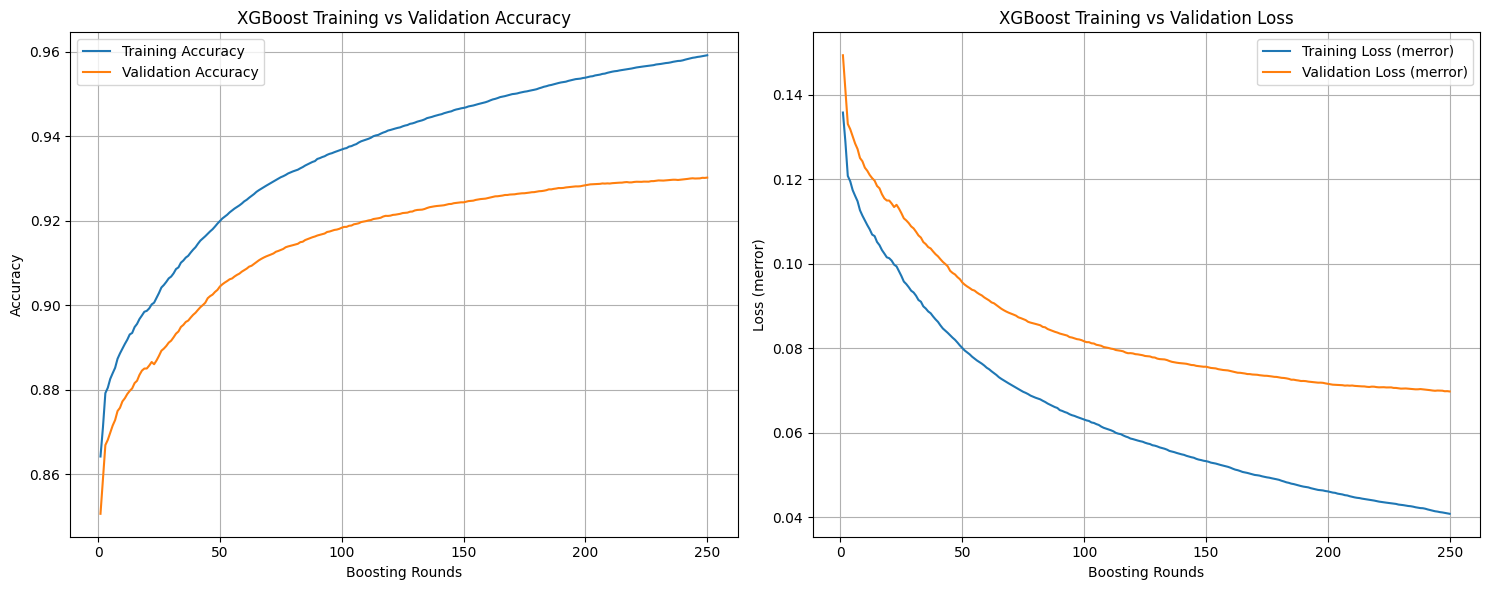

In [ ]:
results = model.evals_result()
print(results)

train_error = results["validation_0"]["merror"]
val_error = results["validation_1"]["merror"]
train_acc = [1 - e for e in train_error]
val_acc = [1 - e for e in val_error]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

epochs = range(1, len(val_acc) + 1)
ax1.plot(epochs, train_acc, label="Training Accuracy")
ax1.plot(epochs, val_acc, label="Validation Accuracy")
ax1.set_xlabel("Boosting Rounds")
ax1.set_ylabel("Accuracy")
ax1.set_title("XGBoost Training vs Validation Accuracy")
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, train_error, label="Training Loss (merror)")
ax2.plot(epochs, val_error, label="Validation Loss (merror)")
ax2.set_xlabel("Boosting Rounds")
ax2.set_ylabel("Loss (merror)")
ax2.set_title("XGBoost Training vs Validation Loss")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % (accuracy*100))

# F1 Score
f1 = f1_score(y_test, y_pr
              ed, average='weighted')
print("F1 Score: %.2f" % (f1*100))

# Classification Report
print(classification_report(y_test, y_pred, digits=4))


Accuracy: 94.40
F1 Score: 94.17
              precision    recall  f1-score   support

           0     0.9306    0.9956    0.9620    230400
           1     0.9898    0.9905    0.9902     12000
           2     0.9970    0.9832    0.9901     12000
           3     0.9389    0.9895    0.9635     12000
           4     0.9819    0.9864    0.9842     12000
           5     1.0000    0.9998    0.9999     12000
           6     0.9999    1.0000    1.0000     12000
           7     0.9652    0.8884    0.9252     12000
           8     0.9009    0.7285    0.8056     12000
           9     0.9466    0.7877    0.8599     12000
          10     0.8843    0.8417    0.8625     12000
          11     0.9746    0.8935    0.9323     12000
          12     0.9904    0.9787    0.9845     12000
          13     0.9755    0.6958    0.8123     12000
          14     0.9716    0.9208    0.9455     12000
          15     0.9004    0.9243    0.9122     12000
          16     0.9428    0.7450    0.8323     1

In [ ]:
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Train Accuracy: %.2f" % (train_accuracy * 100))

Train Accuracy: 95.92


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

FP = np.sum(cm, axis=0) - np.diag(cm)  # False Positives per class
TP = np.diag(cm)  # True Positives per class

# Avoid division by zero
FDR = np.sum(FP) / (np.sum(FP) + np.sum(TP)) if (np.sum(FP) + np.sum(TP)) > 0 else 0

print("Overall FDR:", FDR)

Overall FDR: 0.0560036832412523


In [ ]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 18


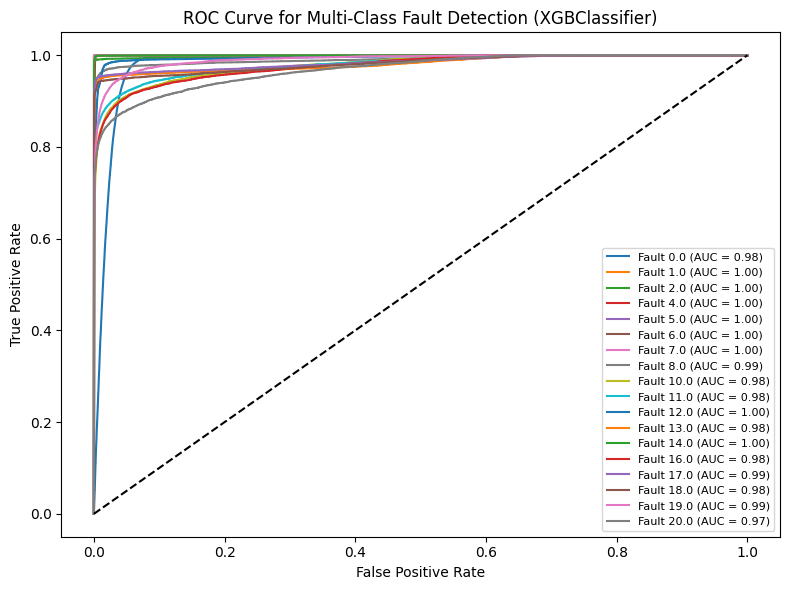

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the actual fault numbers from the label encoder
actual_fault_numbers = label_encoder.classes_

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))  # Back to original size

for i in range(y_test_bin.shape[1]):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Fault {actual_fault_numbers[i]} (AUC = {roc_auc:.2f})")

# Plot reference line (no-discrimination line)
plt.plot([0, 1], [0, 1], "k--")

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Fault Detection (XGBClassifier)")
plt.legend(loc="lower right", fontsize=8)  # Back to original position with small font
plt.tight_layout()
plt.show()

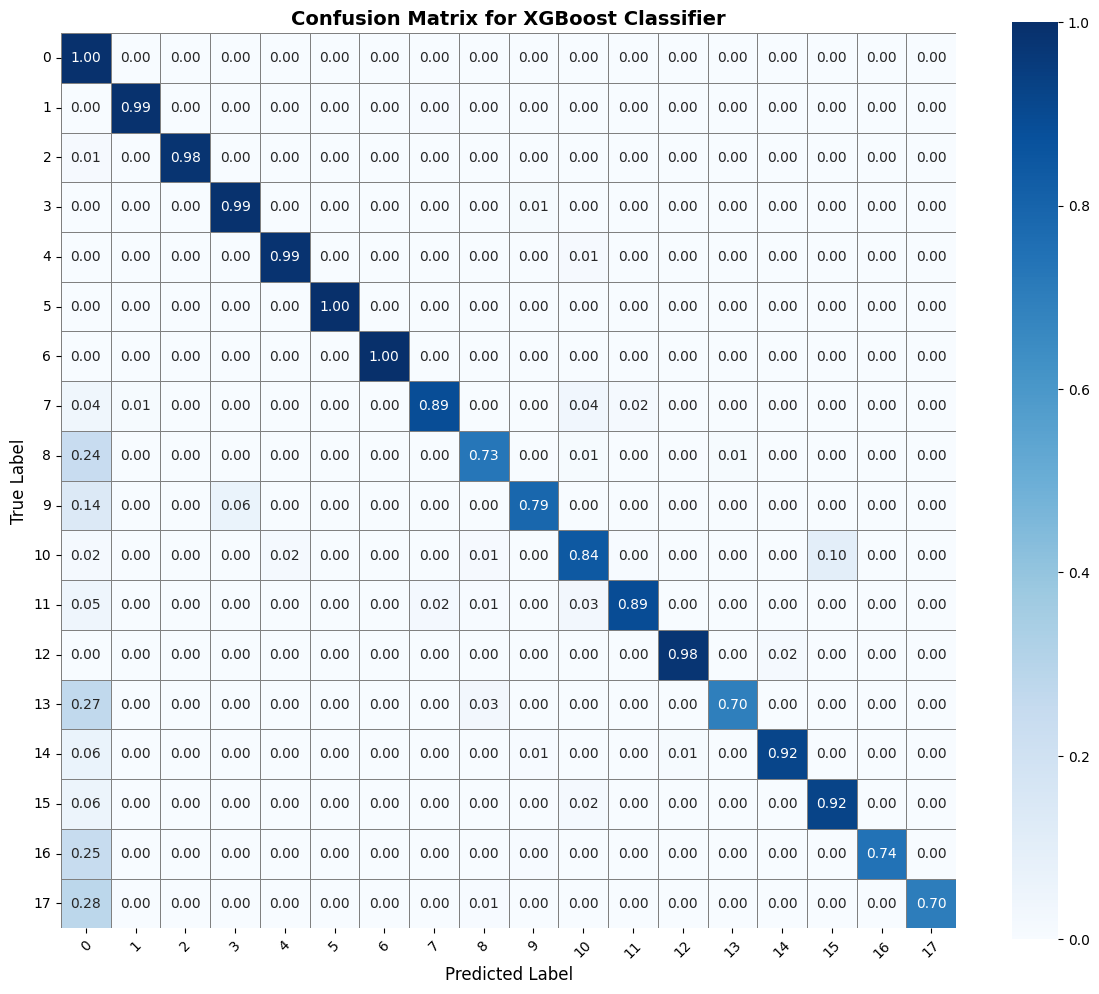

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm_normalized,
            annot=True,
            fmt=".2f",
            cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_,
            cbar=True,
            square=True,
            linewidths=0.5,
            linecolor="gray",
            ax=ax)


ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)
ax.set_title("Confusion Matrix for XGBoost Classifier", fontsize=14, fontweight="bold")

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

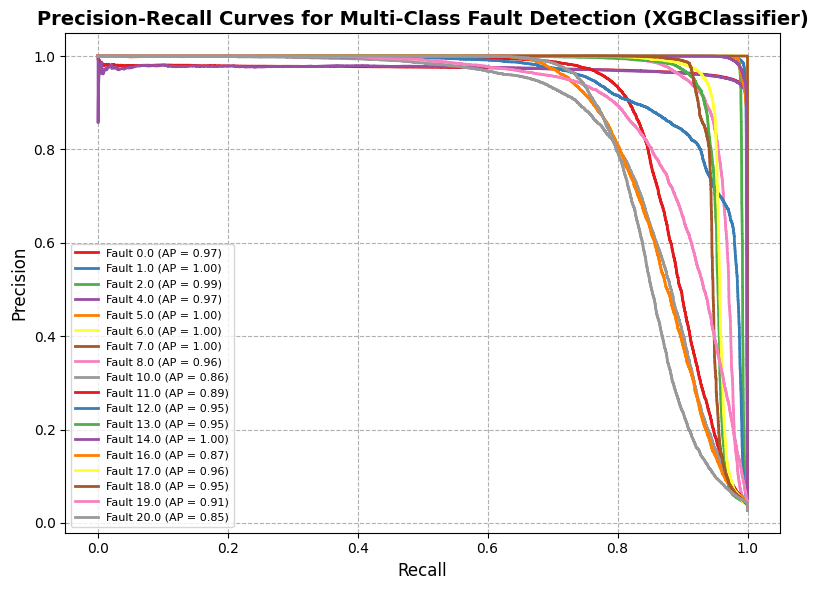

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_pred_prob = model.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the actual fault numbers from the label encoder
actual_fault_numbers = label_encoder.classes_

cmap = plt.get_cmap("Set1")
plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])

    plt.plot(recall, precision,
             label=f'Fault {actual_fault_numbers[i]} (AP = {avg_precision:.2f})',
             color=cmap(i % cmap.N),
             linewidth=2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves for Multi-Class Fault Detection (XGBClassifier)',
          fontsize=14, fontweight='bold')
plt.legend(loc='lower left', fontsize=8)  # Made font size smaller to match ROC curve
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()